In [12]:
import os
os.listdir()



['.config', 'drive', 'diabetes_.csv', 'sample_data']

In [9]:
from google.colab import files
files.upload()



Saving diabetes_.csv to diabetes_.csv


{'diabetes_.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,4

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [15]:
#Problem-1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

df = pd.read_csv("diabetes_.csv")

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [20]:
#3
x=df.drop('Outcome',axis=1).values
y=df['Outcome'].values

#Suffling data
#Train-Test Split(70-30%)
np.random.seed(42)
indices = np.random.permutation(len(x))
train_size=int(0.7*len(x))
train_idx=indices[:train_size]
test_idx = indices[train_size:]
x_train, x_test = x[train_idx], x[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

In [21]:
#4
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1-x2)** 2))


In [22]:
#Predict Single Point
def knn_predict_single(X_train, y_train, x_query, k):
    distances = []   # ✅ initialize list

    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], x_query)
        distances.append((dist, y_train[i]))

    distances.sort(key=lambda x: x[0])
    neighbors = distances[:k]

    labels = [label for _, label in neighbors]
    return max(set(labels), key=labels.count)


In [23]:
#Predict multiple points
def knn_predict(x_train, y_train, x_test, k):
  predictions = []
  for x in x_test:
    predictions.append(knn_predict_single(x_train, y_train, x, k))
  return np.array(predictions)

In [24]:
#Accuracy Function
def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)

In [32]:
#Evaluate model(k=5)
k=5
start = time.time()
y_pred= knn_predict(x_train, y_train, x_test, k)
acc_original = accuracy(y_test, y_pred)

end = time.time()
print("Accuracy (Original Data):", acc_original)
print("Time Taken:", end - start, "seconds")

Accuracy (Original Data): 0.7142857142857143
Time Taken: 0.9174478054046631 seconds


In [31]:
#Problem-2
#Standardization from Scratch
def standardize(x):
  return (x-np.mean(x, axis=0)) / np.std(x, axis=0)
x_scaled = standardize(x)
x_train_s, x_test_s = x_scaled[train_idx], x_scaled[test_idx]

In [30]:
start = time.time()
y_pred_scaled = knn_predict(x_train_s, y_train, x_test_s, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
end = time.time()
print("Accuracy (Scaled Data):", acc_scaled)
print("Time Taken:", end - start, "seconds")

Accuracy (Scaled Data): 0.7402597402597403
Time Taken: 0.9157857894897461 seconds


In [28]:
#Problem-3
k_values = range(1,16)
acc_orig_list = []
acc_scaled_list = []
time_orig_list = []
time_scaled_list = []

for k in k_values:
    start = time.time()
    pred_o = knn_predict(x_train, y_train, x_test, k)
    time_orig_list.append(time.time() - start)
    acc_orig_list.append(accuracy(y_test, pred_o))

    start = time.time()
    pred_s = knn_predict(x_train_s, y_train, x_test_s, k)
    time_scaled_list.append(time.time() - start)
    acc_scaled_list.append(accuracy(y_test, pred_s))


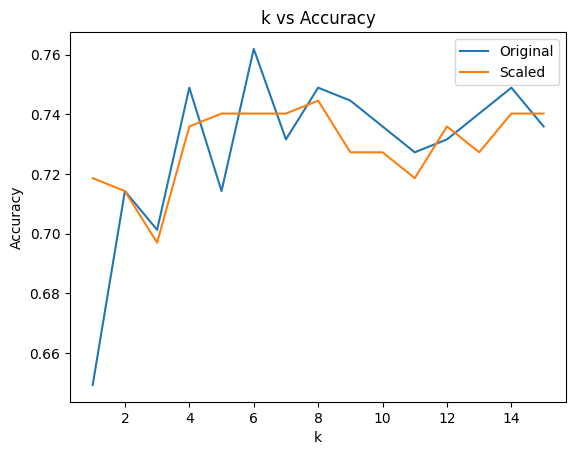

In [29]:
#Visualizations
#k vs Accuracy
plt.figure()
plt.plot(k_values, acc_orig_list, label='Original')
plt.plot(k_values, acc_scaled_list, label='Scaled')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()

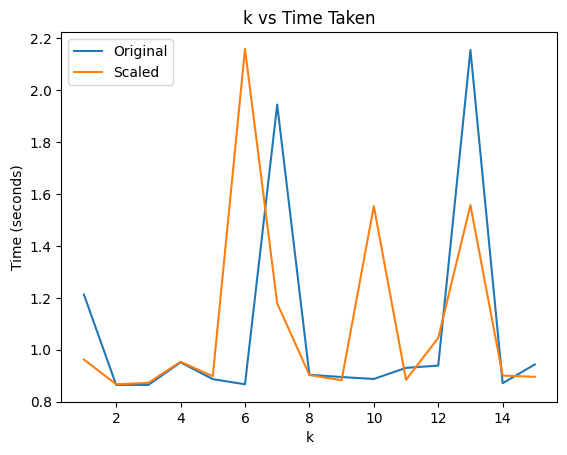

In [33]:
#k vs Time Taken
plt.figure()
plt.plot(k_values, time_orig_list, label='Original')
plt.plot(k_values, time_scaled_list, label='Scaled')
plt.xlabel('k')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.show()